In [151]:
import matplotlib as mpl
from matplotlib import pyplot as plt

# define matplotlib style
plt.style.use("classic")
mpl.rc("xtick", labelsize=23)
mpl.rc("ytick", labelsize=23)
mpl.rc("xtick.major", size=15, width=2)
mpl.rc("xtick.minor", size=8, width=2, visible=True)
mpl.rc("ytick.major", size=15, width=2)
mpl.rc("ytick.minor", size=8, width=2, visible=True)
mpl.rc("lines", linewidth=3, markersize=20)
mpl.rc("axes", linewidth=2, labelsize=30, labelpad=2.5)
mpl.rc("legend", fontsize=25, loc="best", frameon=False, numpoints=1)

mpl.rc("font", family="STIXGeneral")
mpl.rc("mathtext", fontset="stix")

In [152]:
import numpy as np

In [153]:
from tidaldisruptionlrd import diffusion_coeff, eddington_inversion, utils
from tidaldisruptionlrd.constants import G

In [154]:
import importlib

importlib.reload(utils)
importlib.reload(eddington_inversion)
importlib.reload(diffusion_coeff)

<module 'tidaldisruptionlrd.diffusion_coeff' from '/Users/vinhtran/Data/Research/Mark/LRD Tidal Disruption/TidalDisruptionLRD/src/tidaldisruptionlrd/diffusion_coeff.py'>

In [155]:
class IsothermalSphereProfile(eddington_inversion.BaseProfile):
    def __init__(
        self,
        M_bh,
        sigma=None,
        r_bin_min_scaler=1e-4,
        r_bin_max_scaler=1e5,
        N_bins=10000,
    ):
        self.sigma = sigma or self._get_sigma(M_bh)
        self.r_h = G * M_bh / self.sigma**2
        super().__init__(
            r_bin_min=r_bin_min_scaler * self.r_h,
            r_bin_max=r_bin_max_scaler * self.r_h,
            N_bins=N_bins,
            M_bh=M_bh,
            r_zero_phi=self.r_h,
        )

    def _get_sigma(self, M_bh):
        return 200 * (M_bh / 1.48e8) ** (1 / 4.65)

    def _get_stellar_rho_bins(self, r_bins):
        return self.sigma**2 / (2 * np.pi * G * r_bins**2)

In [156]:
isothermal_sphere = IsothermalSphereProfile(M_bh=1e8, sigma=None)

Eddington's inversion: 100%|██████████| 9999/9999 [00:15<00:00, 631.28it/s]


In [157]:
reconstructed_stellar_rho_bins = isothermal_sphere.reconstruct_stellar_rho_bins()

/Users/vinhtran/Data/Research/Mark/LRD Tidal Disruption/TidalDisruptionLRD/src/tidaldisruptionlrd/eddington_inversion.py:222: RuntimeWarning: divide by zero encountered in log
  
Reconstructing densities: 100%|██████████| 10000/10000 [00:07<00:00, 1307.13it/s]


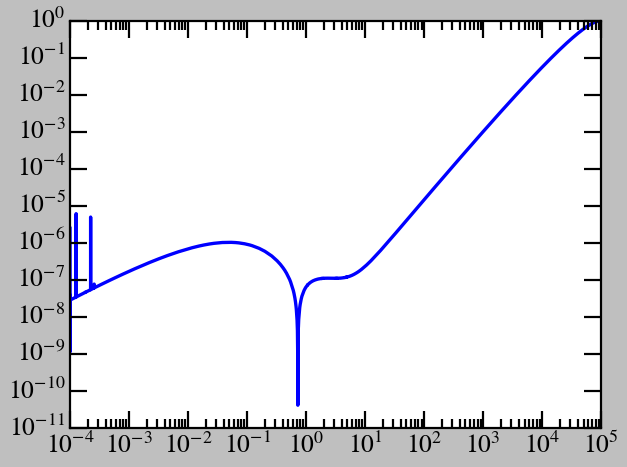

In [158]:
r_bins = isothermal_sphere.r_bins
r_h = isothermal_sphere.r_h
analytic_stellar_rho_bins = isothermal_sphere.stellar_rho_bins

plt.plot(
    r_bins / r_h, np.abs(1 - reconstructed_stellar_rho_bins / analytic_stellar_rho_bins)
)

plt.xscale("log")
plt.yscale("log")

plt.tight_layout()
plt.show()

In [159]:
isothermal_sphere.eta_bins

array([-7.78112590e+05, -7.77972514e+05, -7.77832438e+05, ...,
        3.37111361e+08,  3.37809610e+08,  3.38509306e+08], shape=(10000,))

In [160]:
np.log10(np.trapezoid(isothermal_sphere.f_eta_bins, isothermal_sphere.eta_bins))

np.float64(15.60339845278705)

In [161]:
np.log10(isothermal_sphere.stellar_mass_bins[-1])

np.float64(13.301029995374451)

In [162]:
isothermal_sphere.eta_bins

array([-7.78112590e+05, -7.77972514e+05, -7.77832438e+05, ...,
        3.37111361e+08,  3.37809610e+08,  3.38509306e+08], shape=(10000,))

In [176]:
isothermal_sphere.f_eta_bins

array([0.00000000e+00, 5.74897728e-07, 8.15279293e-07, ...,
       1.77652895e+07, 1.79093487e+07, 1.81992102e+07], shape=(10000,))

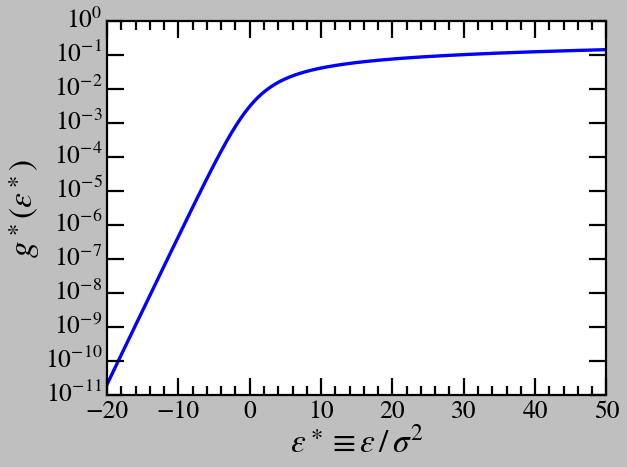

In [183]:
plt.plot(
    isothermal_sphere.eta_bins / isothermal_sphere.sigma**2,
    isothermal_sphere.f_eta_bins
    * isothermal_sphere.r_h**3
    * isothermal_sphere.sigma**3
    / isothermal_sphere.M_bh,
)

# plt.axvline(-isothermal_sphere.stellar_phi_bins[np.argmin(isothermal_sphere.r_bins - isothermal_sphere.r_h)] - G * isothermal_sphere.M_bh / isothermal_sphere.r_h / isothermal_sphere.sigma**2,
#             color="k", ls="--", label=r"$\eta_h$")

# plt.xscale("log")
plt.yscale("log")

plt.xlim(-20, 50)
plt.ylim(1e-11, 1e0)

plt.xlabel(r"$\epsilon^\ast \equiv \epsilon \, / \, \sigma^2$")
plt.ylabel(r"$g^\ast (\epsilon^\ast)$")

plt.tight_layout()
plt.show()

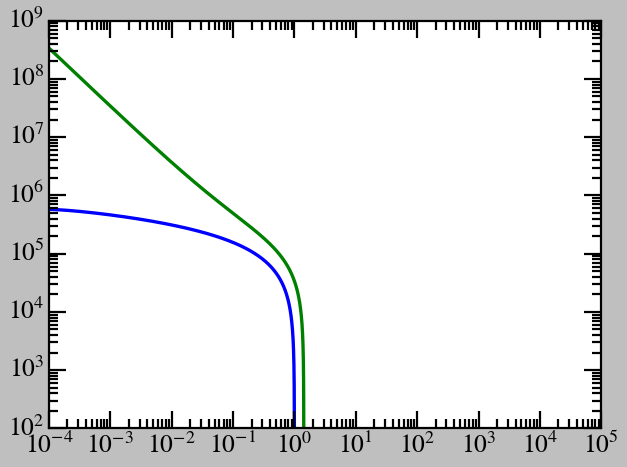

In [164]:
plt.plot(
    isothermal_sphere.r_bins / isothermal_sphere.r_h,
    -isothermal_sphere.stellar_phi_bins,
)
plt.plot(isothermal_sphere.r_bins / isothermal_sphere.r_h, -isothermal_sphere.phi_bins)

plt.xscale("log")
plt.yscale("log")

plt.tight_layout()
plt.show()

In [165]:
importlib.reload(diffusion_coeff)

<module 'tidaldisruptionlrd.diffusion_coeff' from '/Users/vinhtran/Data/Research/Mark/LRD Tidal Disruption/TidalDisruptionLRD/src/tidaldisruptionlrd/diffusion_coeff.py'>

In [166]:
isothermal_diffusion_coeff = diffusion_coeff.DiffusionCoefficient(
    r_bins=isothermal_sphere.r_bins,
    phi_bins=isothermal_sphere.phi_bins,
    eta_bins=isothermal_sphere.eta_bins,
    f_eta_bins=isothermal_sphere.f_eta_bins,
)

/Users/vinhtran/Data/Research/Mark/LRD Tidal Disruption/TidalDisruptionLRD/src/tidaldisruptionlrd/diffusion_coeff.py:74: RuntimeWarning: invalid value encountered in log
  
/Users/vinhtran/Data/Research/Mark/LRD Tidal Disruption/TidalDisruptionLRD/src/tidaldisruptionlrd/diffusion_coeff.py:76: RuntimeWarning: invalid value encountered in log
  np.log(self.psi_bins), np.log(self.r_bins)
/Users/vinhtran/Data/Research/Mark/LRD Tidal Disruption/TidalDisruptionLRD/src/tidaldisruptionlrd/diffusion_coeff.py:79: RuntimeWarning: invalid value encountered in log
  _dlnr_dlnpsi_bins = np.gradient(np.log(self.r_bins), np.log(self.psi_bins))
/Users/vinhtran/Data/Research/Mark/LRD Tidal Disruption/TidalDisruptionLRD/src/tidaldisruptionlrd/diffusion_coeff.py:97: RuntimeWarning: invalid value encountered in log
  _orbit_Jc_sqr_bins = self.psi_bins * self.r_bins**2
/Users/vinhtran/Data/Research/Mark/LRD Tidal Disruption/TidalDisruptionLRD/src/tidaldisruptionlrd/diffusion_coeff.py:109: RuntimeWarning: di

In [167]:
eta = 0.844
m_star = 1
r_star = 1 * 2.25461e-11

M_bh = isothermal_sphere.M_bh
sigma = isothermal_sphere.sigma

r_h = G * M_bh / sigma**2
r_t = (eta**2 * M_bh / m_star) ** (1 / 3) * r_star

In [168]:
psi_h = 2 * sigma**2 * np.log(isothermal_sphere._r_bin_max / r_h)

In [169]:
eta_h = -isothermal_sphere.phi_bins[np.argmin(np.abs(isothermal_sphere.r_bins - r_h))]

In [170]:
Jc_sqr_interp = isothermal_diffusion_coeff._get_Jc_sqr_interp()
Jlc_sqr = 2 * G * M_bh * r_t

Rlc = Jlc_sqr / np.exp(Jc_sqr_interp(np.log(isothermal_diffusion_coeff.eta_bins)))

/var/folders/_n/k8j9__0s4x1b10rq7h7zj1bc0000gq/T/ipykernel_28948/2672749793.py:4: RuntimeWarning: invalid value encountered in log
  Rlc = Jlc_sqr / np.exp(Jc_sqr_interp(np.log(isothermal_diffusion_coeff.eta_bins)))


In [171]:
Lambda = 0.4 * M_bh / m_star
scaler = 32 * np.pi**2 * G**2 * m_star**2 * np.log(Lambda) / 3

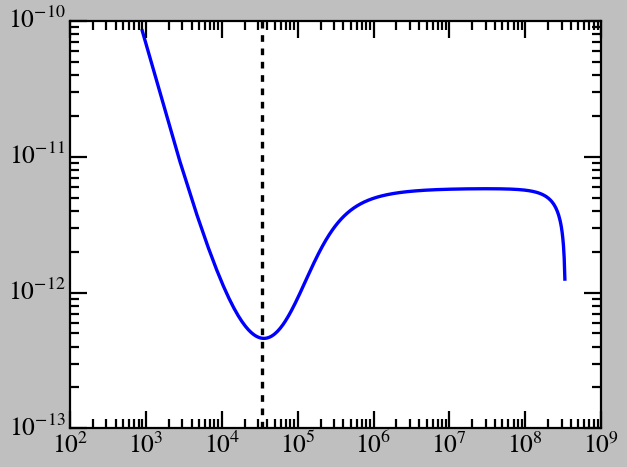

In [172]:
plt.plot(
    isothermal_diffusion_coeff.eta_bins,
    Rlc * scaler * isothermal_diffusion_coeff.scaled_diff_coeff_bins,
)

plt.axvline(eta_h, color="k", ls="--", label=r"$\eta_h$")

plt.xscale("log")
plt.yscale("log")

plt.tight_layout()
plt.show()